In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#  ***Importing libaries***

In [2]:
import cuml
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# ***Importing Datasets***

In [3]:
train_path = '../input/analytics-vidhya-jobathon1-2022/train_wn75k28.csv'
test_path = '../input/analytics-vidhya-jobathon1-2022/test_Wf7sxXF.csv'
sub_path = '../input/analytics-vidhya-jobathon1-2022/sample_submission_2zvVjBu.csv'

In [4]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_sub = pd.read_csv(sub_path)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [6]:
df_train['user_activity_var_9'].value_counts()

0    38713
1      448
Name: user_activity_var_9, dtype: int64

In [7]:
df_test['user_activity_var_9'].value_counts()

0    13074
1      109
2        1
Name: user_activity_var_9, dtype: int64

# ***Feature Engineering***

In [8]:
df_train['indicator_signup_date'] = df_train['signup_date'].isnull()
df_train['indicator_products_purchased'] = df_train['products_purchased'].isnull()
df_test['indicator_signup_date'] = df_test['signup_date'].isnull()
df_test['indicator_products_purchased'] = df_test['products_purchased'].isnull()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train['indicator_signup_date'] = le.fit_transform(df_train['indicator_signup_date'].astype(str))  
df_train['indicator_products_purchased'] = le.fit_transform(df_train['indicator_products_purchased'].astype(str))  
df_test['indicator_signup_date'] = le.fit_transform(df_test['indicator_signup_date'].astype(str))  
df_test['indicator_products_purchased'] = le.fit_transform(df_test['indicator_products_purchased'].astype(str)) 

# ***Data Preprocessing***

In [9]:
df_train['created_at'] = pd.to_datetime(df_train['created_at'])
df_train['signup_date'] = pd.to_datetime(df_train['signup_date'])

In [10]:
df_test['created_at'] = pd.to_datetime(df_test['created_at'])
df_test['signup_date'] = pd.to_datetime(df_test['signup_date'])

In [11]:
df_train['products_purchased'] = df_train['products_purchased'].fillna(0)
df_test['products_purchased'] = df_test['products_purchased'].fillna(0)

In [12]:
combo = pd.concat([df_train.drop('buy',axis=1),df_test], ignore_index=False)
combo.drop(['id','created_at','signup_date'],axis=1,inplace=True)
combo

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,indicator_signup_date,indicator_products_purchased
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,6,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,16,12,0.0,0,0,0,0,0,1,1,0,0,0,0,0,1,1
13180,12,8,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
13181,14,14,3.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
13182,14,10,0.0,0,0,0,0,0,0,1,0,0,0,1,0,1,1


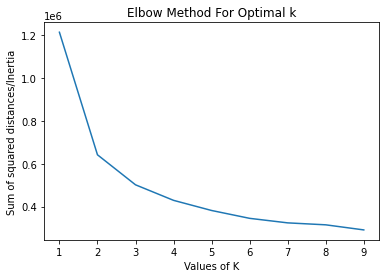

In [13]:
from cuml.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(combo)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances)
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
k_means = KMeans(n_clusters=2)
k_means.fit(combo)

labels = k_means.predict(combo)
combo['label'] = labels

In [15]:
combo['label'].value_counts()

0    29488
1    22857
Name: label, dtype: int64

In [16]:
df_train['label'] = combo['label'].head(df_train.shape[0])
df_test['label'] = combo['label'].tail(df_test.shape[0])

In [17]:
df_train['camapign_var'] = df_train['campaign_var_1'] + df_train['campaign_var_2']
df_test['camapign_var'] = df_test['campaign_var_1'] + df_test['campaign_var_2']

In [18]:
dumm_feat = ['id','created_at','signup_date','buy','camapign_var','campaign_var_1','campaign_var_2'] # ,'products_purchased'
CAT_FEATURE = [feat for feat in df_train.columns if feat not in dumm_feat]
CAT_FEATURE

['products_purchased',
 'user_activity_var_1',
 'user_activity_var_2',
 'user_activity_var_3',
 'user_activity_var_4',
 'user_activity_var_5',
 'user_activity_var_6',
 'user_activity_var_7',
 'user_activity_var_8',
 'user_activity_var_9',
 'user_activity_var_10',
 'user_activity_var_11',
 'user_activity_var_12',
 'indicator_signup_date',
 'indicator_products_purchased',
 'label']

In [19]:
for feat in CAT_FEATURE:
    df_train[feat] = df_train[feat].astype('int64')
    df_test[feat] = df_test[feat].astype('int64')

# ***Data Visualization***

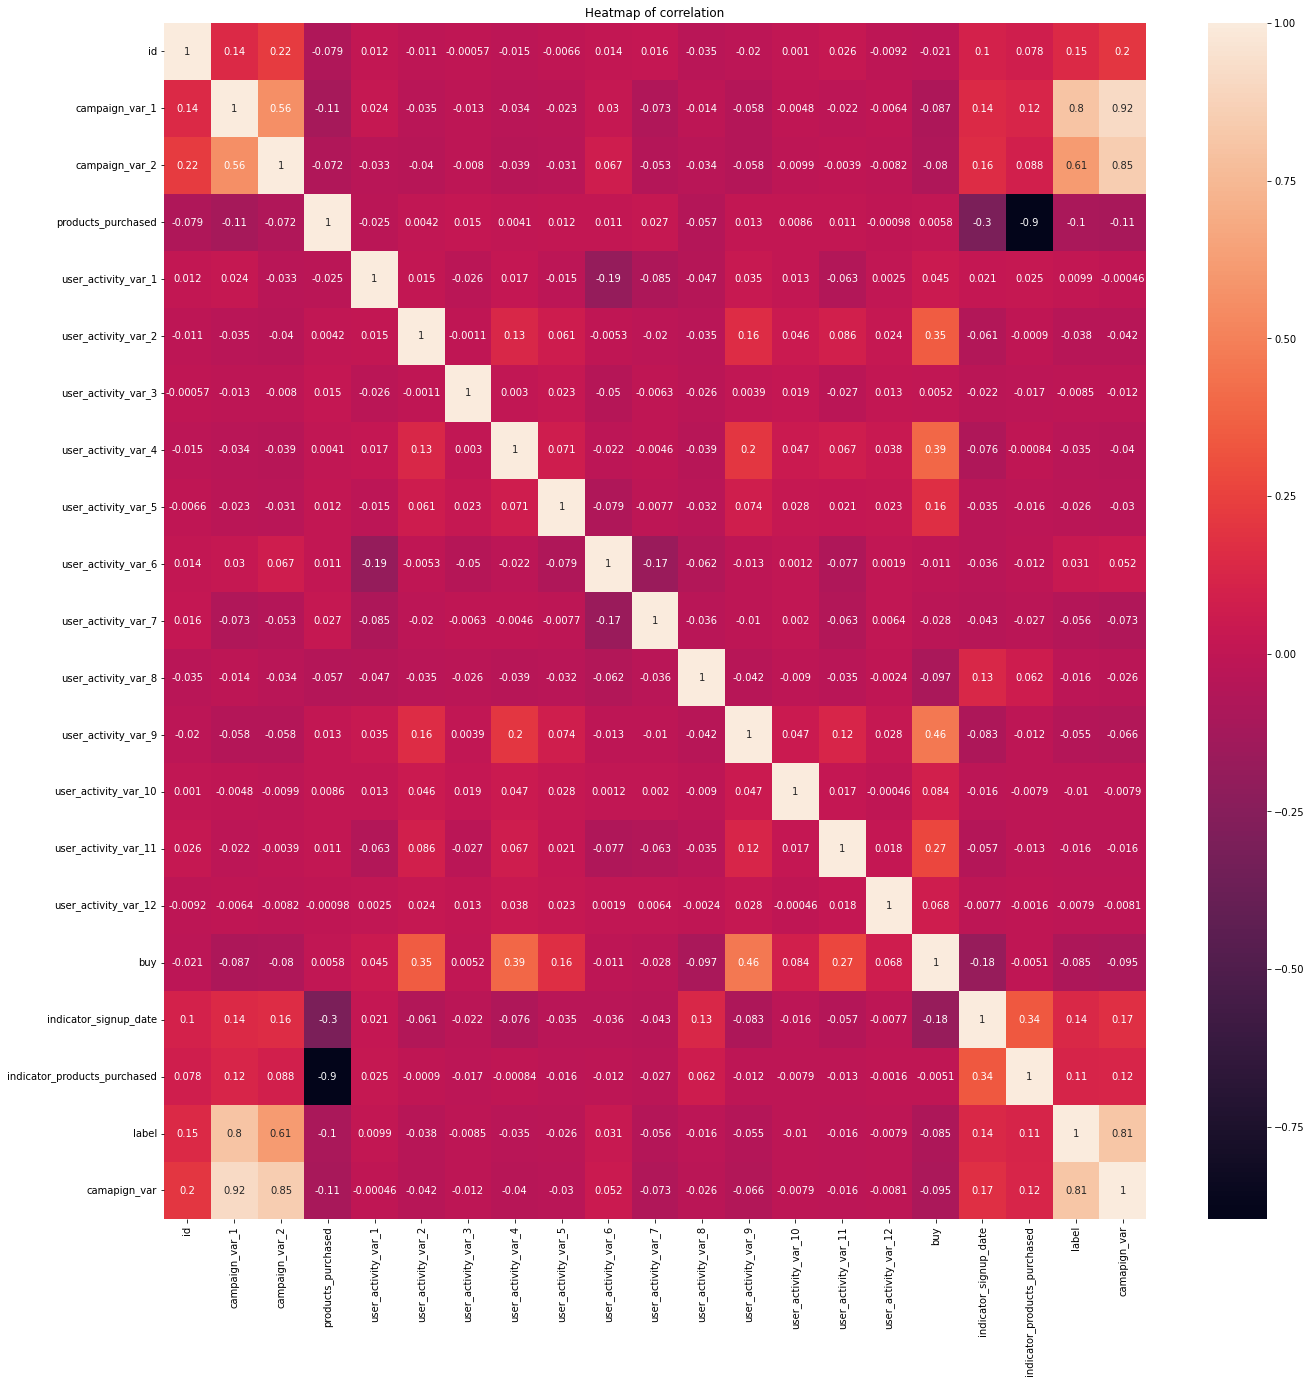

In [21]:
import matplotlib
plt.figure(figsize=(22,22))
sns.heatmap(data=df_train.corr(),annot=True)
plt.title('Heatmap of correlation')
plt.show()

[Text(0, 0, '37163'), Text(0, 0, '1998')]

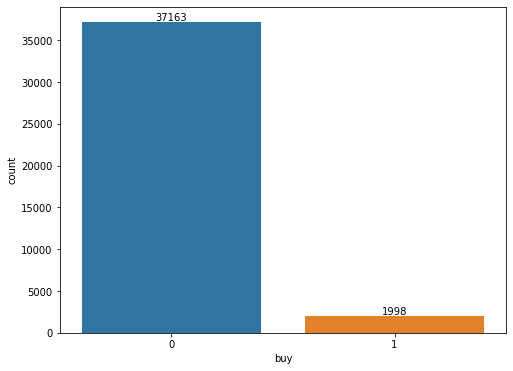

In [24]:
plt.figure(figsize=(8,6))


ax = sns.countplot(data = df_train,x='buy')
ax.bar_label(ax.containers[0])

**This is imbalanced datset having 37163 no. of zeros and 1998 no. of ones in target variable.**

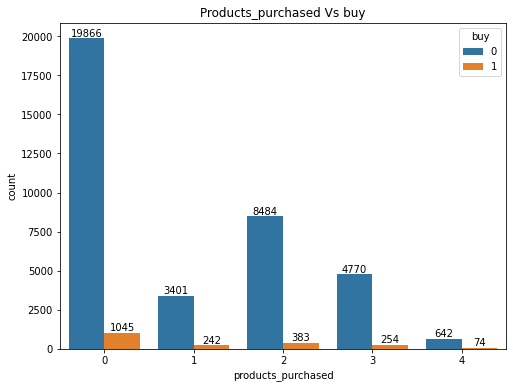

In [27]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_train,x='products_purchased',hue='buy')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('Products_purchased Vs buy')
plt.show()

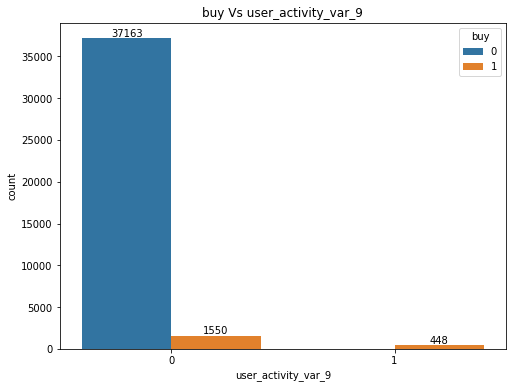

In [29]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_train,x='user_activity_var_9',hue='buy')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('buy Vs user_activity_var_9')
plt.show()

**"user_activity_var_9" is an important feature for determining the target variable "buy".**

## ***Define Target Variable (y) and Feature Variables (X)***

In [30]:
train = df_train.copy()
x = train.drop(['id','created_at','signup_date','buy'],axis=1) # 'id',
y = df_train['buy']
test = df_test.drop(['id','created_at','signup_date'],axis=1) # 'id',

# ***Train Test Split***

In [31]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train ,y_test = train_test_split(x,y,stratify=y,test_size=0.2,random_state=101)

# ***Modelling***

In [32]:
from sklearn.metrics import f1_score
import numpy as np

def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    return 'f1_err', err

## **XGBoost Classifier**

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
from sklearn.metrics import classification_report

xgbc = XGBClassifier(n_estimators = 80)

xgbc.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]],eval_metric=f1_eval)

y_test_preds_proba_xgbc = xgbc.predict_proba(x_test)
y_test_preds_xgbc = xgbc.predict(x_test)
print()     
print('F1 Score   '+str(f1_score(y_test, y_test_preds_xgbc)))
print()
print(classification_report(y_test, y_test_preds_xgbc))

[0]	validation_0-logloss:0.46173	validation_0-f1_err:0.32227	validation_1-logloss:0.46102	validation_1-f1_err:0.29187
[1]	validation_0-logloss:0.33483	validation_0-f1_err:0.32496	validation_1-logloss:0.33337	validation_1-f1_err:0.29187
[2]	validation_0-logloss:0.25635	validation_0-f1_err:0.32416	validation_1-logloss:0.25446	validation_1-f1_err:0.29187
[3]	validation_0-logloss:0.20505	validation_0-f1_err:0.32416	validation_1-logloss:0.20285	validation_1-f1_err:0.29187
[4]	validation_0-logloss:0.16984	validation_0-f1_err:0.32416	validation_1-logloss:0.16762	validation_1-f1_err:0.29187
[5]	validation_0-logloss:0.14561	validation_0-f1_err:0.32389	validation_1-logloss:0.14360	validation_1-f1_err:0.29187
[6]	validation_0-logloss:0.12855	validation_0-f1_err:0.32333	validation_1-logloss:0.12654	validation_1-f1_err:0.29187
[7]	validation_0-logloss:0.11671	validation_0-f1_err:0.32304	validation_1-logloss:0.11491	validation_1-f1_err:0.29074
[8]	validation_0-logloss:0.10830	validation_0-f1_err:0.3

## **CatBoost Classifier**

In [34]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,f1_score

cbc = CatBoostClassifier(n_estimators = 800,eval_metric='TotalF1',cat_features=CAT_FEATURE)

cbc.fit(x_train,y_train,eval_set=(x_test,y_test))

y_test_preds_proba_cbc = cbc.predict_proba(x_test)
y_test_preds_cbc = cbc.predict(x_test)
print()
print('F1 Score   '+str(f1_score(y_test, y_test_preds_cbc)))
print()
print(classification_report(y_test, y_test_preds_cbc))

Learning rate set to 0.081764
0:	learn: 0.9657494	test: 0.9655778	best: 0.9655778 (0)	total: 121ms	remaining: 1m 36s
1:	learn: 0.9659375	test: 0.9665765	best: 0.9665765 (1)	total: 181ms	remaining: 1m 12s
2:	learn: 0.9657332	test: 0.9657582	best: 0.9665765 (1)	total: 242ms	remaining: 1m 4s
3:	learn: 0.9657494	test: 0.9657582	best: 0.9665765 (1)	total: 298ms	remaining: 59.4s
4:	learn: 0.9657785	test: 0.9657582	best: 0.9665765 (1)	total: 361ms	remaining: 57.3s
5:	learn: 0.9657494	test: 0.9657582	best: 0.9665765 (1)	total: 426ms	remaining: 56.3s
6:	learn: 0.9658369	test: 0.9657582	best: 0.9665765 (1)	total: 471ms	remaining: 53.4s
7:	learn: 0.9658691	test: 0.9659381	best: 0.9665765 (1)	total: 539ms	remaining: 53.4s
8:	learn: 0.9658077	test: 0.9657582	best: 0.9665765 (1)	total: 595ms	remaining: 52.3s
9:	learn: 0.9659505	test: 0.9668750	best: 0.9668750 (9)	total: 652ms	remaining: 51.5s
10:	learn: 0.9702589	test: 0.9728022	best: 0.9728022 (10)	total: 704ms	remaining: 50.5s
11:	learn: 0.9706463

## **LightGBM Classifier**

In [35]:
import lightgbm as lgb
lgc = lgb.LGBMClassifier()

lgc.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]])

y_test_preds_proba_lgc = lgc.predict_proba(x_test)
y_test_preds_lgc = lgc.predict(x_test)

print('F1 Score   '+str(f1_score(y_test, y_test_preds_lgc)))
print(classification_report(y_test, y_test_preds_lgc))

[1]	training's binary_logloss: 0.151345	valid_1's binary_logloss: 0.150326
[2]	training's binary_logloss: 0.139961	valid_1's binary_logloss: 0.139472
[3]	training's binary_logloss: 0.131671	valid_1's binary_logloss: 0.131499
[4]	training's binary_logloss: 0.12514	valid_1's binary_logloss: 0.125281
[5]	training's binary_logloss: 0.119726	valid_1's binary_logloss: 0.119984
[6]	training's binary_logloss: 0.115184	valid_1's binary_logloss: 0.115529
[7]	training's binary_logloss: 0.111291	valid_1's binary_logloss: 0.111821
[8]	training's binary_logloss: 0.107987	valid_1's binary_logloss: 0.108608
[9]	training's binary_logloss: 0.105088	valid_1's binary_logloss: 0.10579
[10]	training's binary_logloss: 0.102551	valid_1's binary_logloss: 0.103383
[11]	training's binary_logloss: 0.100357	valid_1's binary_logloss: 0.101284
[12]	training's binary_logloss: 0.0984034	valid_1's binary_logloss: 0.0993371
[13]	training's binary_logloss: 0.0966363	valid_1's binary_logloss: 0.0976407
[14]	training's bin

## **Stacking Classifier**

In [36]:
from sklearn.ensemble import StackingClassifier
stk = StackingClassifier([('cbc',CatBoostClassifier(eval_metric='TotalF1',cat_features=CAT_FEATURE)),
                          ('lgc',lgb.LGBMClassifier()),
                          ('xgb',XGBClassifier())])
stk.fit(x_train,y_train)
preds_valid = stk.predict(x_test)

print(classification_report(y_test,preds_valid))

Learning rate set to 0.044843
0:	learn: 0.9657494	total: 60.1ms	remaining: 1m
1:	learn: 0.9659375	total: 113ms	remaining: 56.4s
2:	learn: 0.9657332	total: 162ms	remaining: 53.8s
3:	learn: 0.9657494	total: 215ms	remaining: 53.4s
4:	learn: 0.9657785	total: 272ms	remaining: 54.2s
5:	learn: 0.9657785	total: 330ms	remaining: 54.7s
6:	learn: 0.9657624	total: 369ms	remaining: 52.3s
7:	learn: 0.9658077	total: 431ms	remaining: 53.5s
8:	learn: 0.9658077	total: 489ms	remaining: 53.8s
9:	learn: 0.9658077	total: 565ms	remaining: 55.9s
10:	learn: 0.9657785	total: 622ms	remaining: 55.9s
11:	learn: 0.9657494	total: 668ms	remaining: 55s
12:	learn: 0.9658077	total: 716ms	remaining: 54.3s
13:	learn: 0.9658077	total: 776ms	remaining: 54.6s
14:	learn: 0.9658077	total: 803ms	remaining: 52.8s
15:	learn: 0.9687473	total: 853ms	remaining: 52.5s
16:	learn: 0.9696751	total: 901ms	remaining: 52.1s
17:	learn: 0.9704803	total: 953ms	remaining: 52s
18:	learn: 0.9707582	total: 991ms	remaining: 51.2s
19:	learn: 0.9707

# ***Prediction***

In [37]:
preds_test = stk.predict(test)
df_test['buy'] = preds_test

# ***Exporting Prediction***

In [38]:
# preds_test = cbc.predict(test)
df_sub['buy']= df_test['buy']

df_sub.to_csv('submission_stk.csv',index=False)